---

<p> Libreta n° 2 sobre el trabajo de investigación: </p>

<center>

<p> 
    <b> "Estimación de la evapotranspiración espacio-temporal en arrozales usando imágenes satelitales, Departamento de Lambayeque" 
    </b>
</p>


</center>

Autor: Cesar Francisco Vilca Gamarra 

Repositorio alojado en [GitHub](https://github.com/vilcagamarracf/Inv_arroz_METRIC) 

Marzo, 2022

---

# Visualización de datos de estación meteorológica

In [1]:
%pwd

'C:\\Users\\USUARIO\\Documents\\00-notebooks-2022'

In [2]:
# Iniciamos importando librerías
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif' 
plt.rcParams['figure.dpi'] = 72

## Dataframe `EE_Vista_Florida.csv`

Lectura de archivo `.csv`

In [3]:
!pip show pandas

Name: pandas
Version: 1.2.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: 
Author-email: 
License: BSD
Location: c:\users\usuario\anaconda3\envs\geomatica\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: bqplot, geemap, sankee, seaborn


In [3]:
# Lectura
pathCSV = 'EE_Vista_Florida.csv'

dfEstacion = pd.read_csv(pathCSV, na_values='---') 
# df_estacion_vf.columns # Nombre de columnas

dfEstacion.head()

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0  1/10/2021  01:00      17.8     17.8      15.9     89.0     15.9   
1  1/10/2021  02:00      20.5     20.5      17.8     79.0     16.7   
2  1/10/2021  03:00      23.5     23.5      20.5     69.0     17.5   
3  1/10/2021  04:00      24.8     24.8      23.4     66.0     18.0   
4  1/10/2021  05:00      24.8     24.8      24.0     64.0     17.6   

   Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
0         0.0        N       0.0  ...    61.0    14.9      23.0    11.13   
1         0.0        N       0.0  ...    60.0    15.7      24.1    10.95   
2         0.0      ENE       0.0  ...    58.0    16.2      25.3    10.47   
3         0.0        N       0.0  ...    56.0    16.6      26.4    10.09   
4         0.0      ENE       0.0  ...    54.0    16.4      26.7     9.76   

   In Air Density    ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
0          1.1735  0.10     1403.0      1.0        100.0       60.0  
1          1.1680  0.25     1406.0      1.0        100.0       60.0  
2          1.1625  0.38     1404.0      1.0        100.0       60.0  
3          1.1573  0.48     1405.0      1.0        100.0       60.0  
4          1.1546  0.53     1405.0      1.0        100.0       60.0  

[5 rows x 38 columns]

In [4]:
# Recorte de dataframe
dfEstacion['Fecha'] = dfEstacion.Date + " " + dfEstacion.Time
dfEstacion.Fecha = pd.to_datetime(dfEstacion.Fecha, format='%d/%m/%Y %H:%M')
dfEstacion['month'] = pd.DatetimeIndex(dfEstacion.Fecha).month # minute
dfEstacion['day'] = pd.DatetimeIndex(dfEstacion.Fecha).day
dfEstacion['hour'] = pd.DatetimeIndex(dfEstacion.Fecha).hour

# dfEstacion = dfEstacion[['Fecha', 'Date', 'Time', 'month', 'day', 'hour','Wind Speed', 'ET']]

dfEstacion

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0      1/10/2021  01:00      17.8     17.8      15.9     89.0     15.9   
1      1/10/2021  02:00      20.5     20.5      17.8     79.0     16.7   
2      1/10/2021  03:00      23.5     23.5      20.5     69.0     17.5   
3      1/10/2021  04:00      24.8     24.8      23.4     66.0     18.0   
4      1/10/2021  05:00      24.8     24.8      24.0     64.0     17.6   
...          ...    ...       ...      ...       ...      ...      ...   
17128  4/08/2022  05:40      21.5     21.6      21.5     74.0     16.7   
17129  4/08/2022  10:20       NaN      NaN       NaN      NaN      NaN   
17130  4/08/2022  10:25      21.9     22.2      21.7     75.0     17.3   
17131  4/08/2022  10:30      22.3     22.4      22.2     73.0     17.2   
17132        NaN    NaN       NaN      NaN       NaN      NaN      NaN   

       Wind Speed Wind Dir  Wind Run  ...  In Air Density    ET  Wind Samp  \
0             0.0        N      0.00  ...          1.1735  0.10     1403.0   
1             0.0        N      0.00  ...          1.1680  0.25     1406.0   
2             0.0      ENE      0.00  ...          1.1625  0.38     1404.0   
3             0.0        N      0.00  ...          1.1573  0.48     1405.0   
4             0.0      ENE      0.00  ...          1.1546  0.53     1405.0   
...           ...      ...       ...  ...             ...   ...        ...   
17128         1.6      ENE      0.13  ...          1.1556  0.00       85.0   
17129         0.0      NaN      0.00  ...          1.1553  0.00        0.0   
17130         1.6      ENE      0.13  ...          1.1552  0.00       86.0   
17131         3.2        S      0.27  ...          1.1549  0.00      107.0   
17132         NaN      NaN       NaN  ...             NaN  4.90        NaN   

       Wind Tx  ISS  Recept  Arc. Int.               Fecha  month  day  hour  
0          1.0        100.0       60.0 2021-10-01 01:00:00   10.0  1.0   1.0  
1          1.0        100.0       60.0 2021-10-01 02:00:00   10.0  1.0   2.0  
2          1.0        100.0       60.0 2021-10-01 03:00:00   10.0  1.0   3.0  
3          1.0        100.0       60.0 2021-10-01 04:00:00   10.0  1.0   4.0  
4          1.0        100.0       60.0 2021-10-01 05:00:00   10.0  1.0   5.0  
...        ...          ...        ...                 ...    ...  ...   ...  
17128      1.0         74.6        5.0 2022-08-04 05:40:00    8.0  4.0   5.0  
17129      1.0          0.0        5.0 2022-08-04 10:20:00    8.0  4.0  10.0  
17130      1.0         75.4        5.0 2022-08-04 10:25:00    8.0  4.0  10.0  
17131      1.0         93.9        5.0 2022-08-04 10:30:00    8.0  4.0  10.0  
17132      NaN          NaN        NaN                 NaT    NaN  NaN   NaN  

[17133 rows x 42 columns]

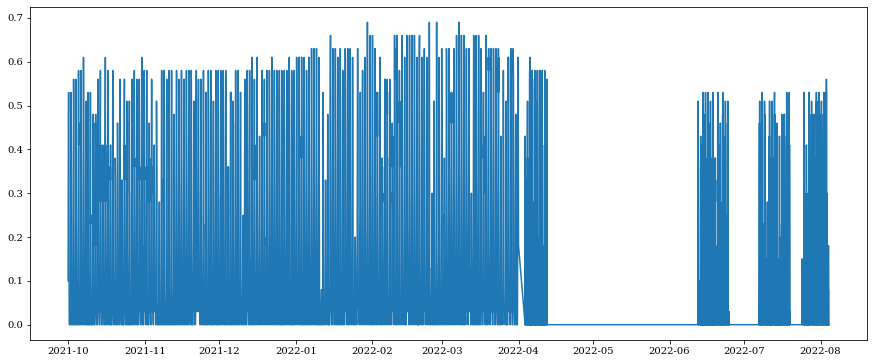

In [5]:
variable = 'ET'

fig, ax = plt.subplots(figsize=(15,6))

# Datos registrados a la hora respectiva
ax.plot(dfEstacion.Fecha, dfEstacion[variable])

# Fechas de imágenes a evaluar
# for fecha in fechas_imgs:
#     ax.axvline(x=pd.Timestamp(fecha), color='red')

# ax.set_title(f'Scatterplot - {variable}')
# ax.set_ylabel(variable);

In [6]:
df_prueba = dfEstacion.copy()
df_prueba.Date = pd.to_datetime(df_prueba.Date, format='%d/%m/%Y')
df_prueba['Time'] = pd.to_numeric(df_prueba['Time'].str.replace(":", "."))

fechas_imgs = [
    '2021-12-12', # Si hay dato
    '2022-01-13', # 
    '2022-01-29',
    '2022-03-10',
    '2022-04-03', # No hay dato 
    '2022-05-21', # No hay dato
    '2022-05-29', # No hay dato
    '2022-06-14'  # Si hay dato
]

datos_hora_imagen = df_prueba[df_prueba['Date'].isin(fechas_imgs)]
datos_hora_imagen

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
1709 2021-12-12   0.00      16.4     16.9      16.4     93.0     15.3   
1710 2021-12-12   1.00      16.1     16.4      16.1     93.0     15.0   
1711 2021-12-12   2.00      16.3     16.4      16.2     94.0     15.4   
1712 2021-12-12   3.00      16.7     16.7      16.2     94.0     15.7   
1713 2021-12-12   4.00      17.7     17.7      16.7     94.0     16.7   
...         ...    ...       ...      ...       ...      ...      ...   
7607 2022-06-14  23.35      15.7     15.8      15.6     84.0     13.0   
7608 2022-06-14  23.40      15.6     15.6      15.5     84.0     12.9   
7609 2022-06-14  23.45      15.4     15.5      15.4     84.0     12.8   
7610 2022-06-14  23.50      15.4     15.4      15.3     85.0     12.9   
7611 2022-06-14  23.55      15.3     15.3      15.2     85.0     12.8   

      Wind Speed Wind Dir  Wind Run  ...  In Air Density    ET  Wind Samp  \
1709         0.0      NaN       0.0  ...          1.1665  0.00     1405.0   
1710         0.0      NaN       0.0  ...          1.1690  0.00     1404.0   
1711         0.0      NaN       0.0  ...          1.1700  0.00     1405.0   
1712         0.0      NaN       0.0  ...          1.1720  0.00     1405.0   
1713         0.0      NaN       0.0  ...          1.1707  0.05     1405.0   
...          ...      ...       ...  ...             ...   ...        ...   
7607         0.0      NaN       0.0  ...          1.1660  0.00      106.0   
7608         0.0      NaN       0.0  ...          1.1660  0.00      106.0   
7609         0.0      NaN       0.0  ...          1.1663  0.00      107.0   
7610         0.0      NaN       0.0  ...          1.1663  0.00      106.0   
7611         0.0      NaN       0.0  ...          1.1663  0.00      105.0   

      Wind Tx  ISS  Recept  Arc. Int.               Fecha  month   day  hour  
1709      1.0        100.0       60.0 2021-12-12 00:00:00   12.0  12.0   0.0  
1710      1.0        100.0       60.0 2021-12-12 01:00:00   12.0  12.0   1.0  
1711      1.0        100.0       60.0 2021-12-12 02:00:00   12.0  12.0   2.0  
1712      1.0        100.0       60.0 2021-12-12 03:00:00   12.0  12.0   3.0  
1713      1.0        100.0       60.0 2021-12-12 04:00:00   12.0  12.0   4.0  
...       ...          ...        ...                 ...    ...   ...   ...  
7607      1.0         93.0        5.0 2022-06-14 23:35:00    6.0  14.0  23.0  
7608      1.0         93.0        5.0 2022-06-14 23:40:00    6.0  14.0  23.0  
7609      1.0         93.9        5.0 2022-06-14 23:45:00    6.0  14.0  23.0  
7610      1.0         93.0        5.0 2022-06-14 23:50:00    6.0  14.0  23.0  
7611      1.0         92.1        5.0 2022-06-14 23:55:00    6.0  14.0  23.0  

[490 rows x 42 columns]

### Visualización por variables

In [7]:
from ipywidgets import interact

In [8]:
def graficaScatter(variable):

    fig, ax = plt.subplots(figsize=(15,6))

    # Datos registrados a la hora respectiva
    ax.scatter(df_prueba.Fecha, df_prueba[variable])

    # Fechas de imágenes a evaluar
    for fecha in fechas_imgs:
        ax.axvline(x=pd.Timestamp(fecha), color='red')

    ax.set_title(f'Scatterplot - {variable}')
    ax.set_ylabel(variable);
    
interact(graficaScatter, variable = ['Time', 'ET', 'Wind Speed']);

interactive(children=(Dropdown(description='variable', options=('Time', 'ET', 'Wind Speed'), value='Time'), Ou…

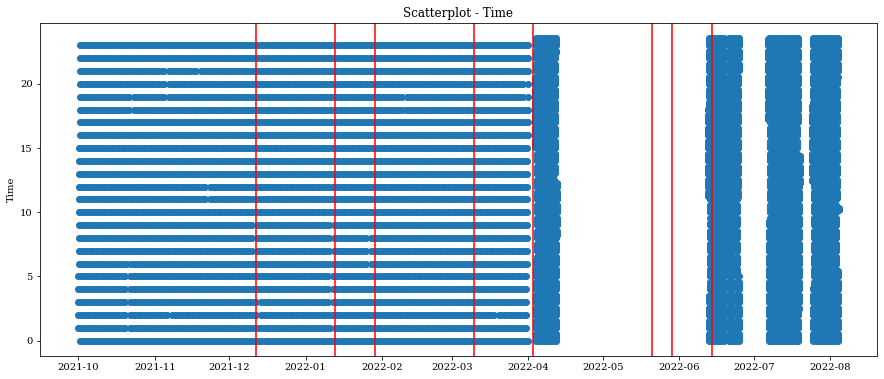

In [25]:
graficaScatter('Time')

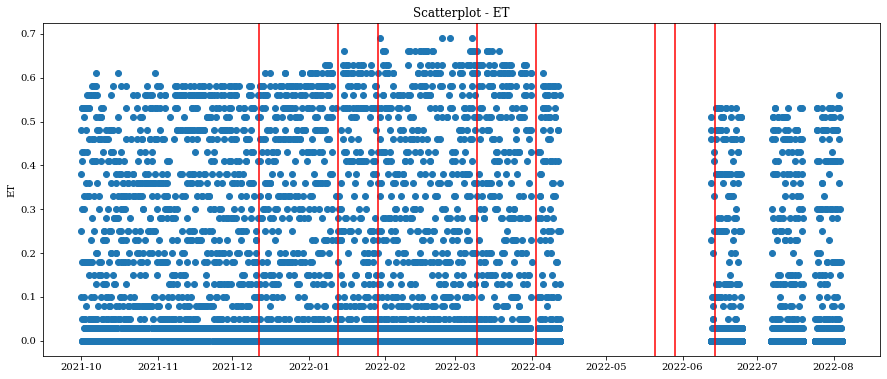

In [26]:
graficaScatter('ET')

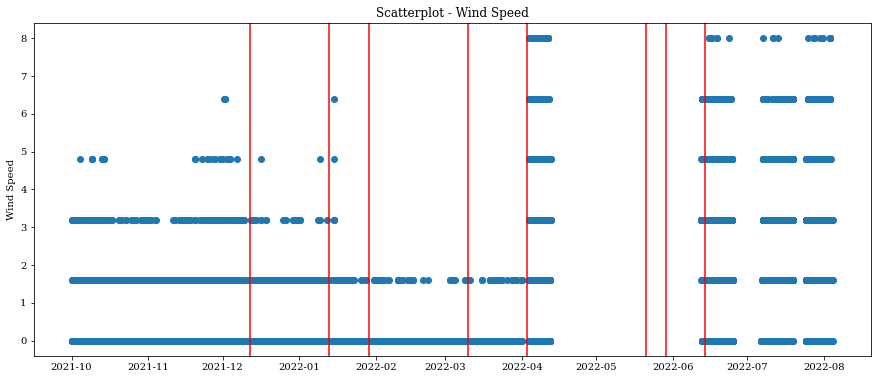

In [27]:
graficaScatter('Wind Speed')

In [12]:
fechas_imgs = [
    '2021-12-12', # Si hay dato
    '2022-01-13', # 
    '2022-01-29',
    '2022-03-10',
    '2022-04-03', # No hay dato 
    '2022-05-21', # No hay dato
    '2022-05-29', # No hay dato
    '2022-06-14'  # Si hay dato
]

### Visualización por días

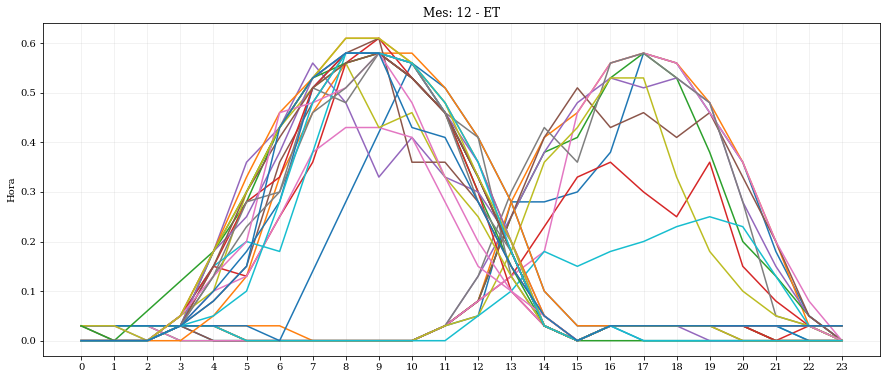

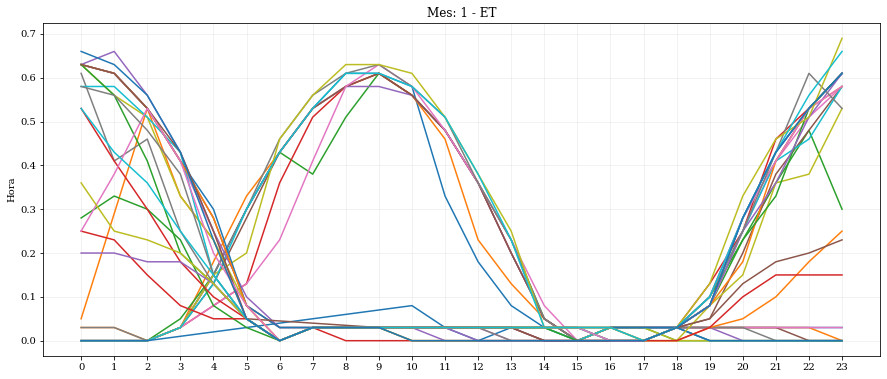

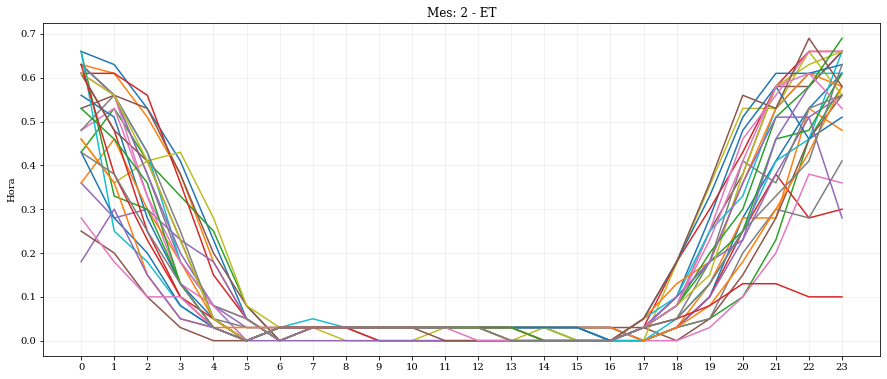

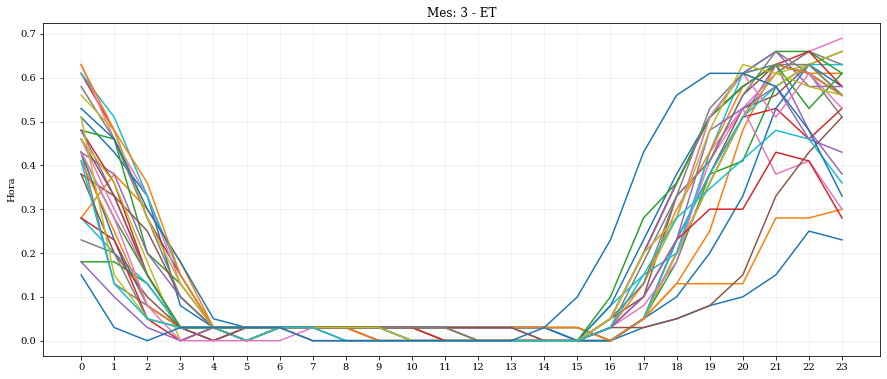

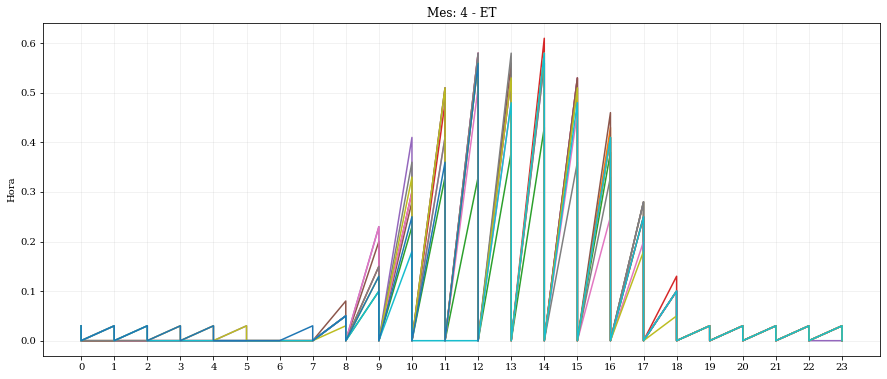

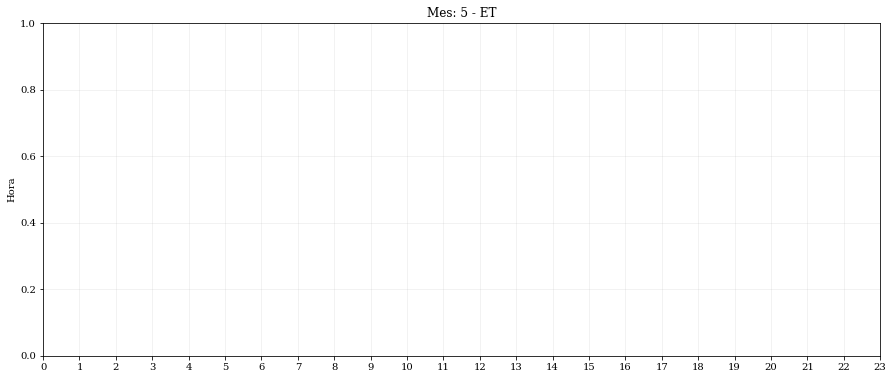

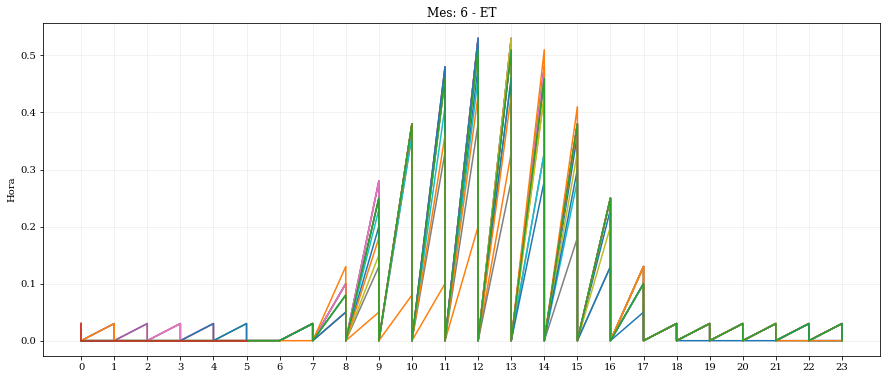

In [9]:
# Mes = 1
variable = 'ET'

for Mes in [12,1,2,3,4,5,6]:
    dfEstacionMes = dfEstacion.copy().query(f'month == {Mes}')

    ldias = dfEstacionMes.Date.unique()
    numero_dias = len(ldias)
    
    # ----------------
    # Gráfica
    # ----------------
    
    fig, ax = plt.subplots(figsize=(15,6))
    
    # Líneas
    for i in range(numero_dias):
        prueba2 = dfEstacionMes[dfEstacionMes['Date']==dfEstacionMes['Date'].unique()[i]]
        ax.plot(prueba2['hour'], prueba2['ET'], label=i)

    # Estilos
    ax.set_title(f'Mes: {Mes} - {variable}')
    ax.set_xticks([i for i in range(0,24,1)]), 
    ax.set_ylabel('Hora')
    # ax.legend()
    ax.grid(alpha=.2);

C:\Users\usuario\anaconda3\envs\geomatica\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


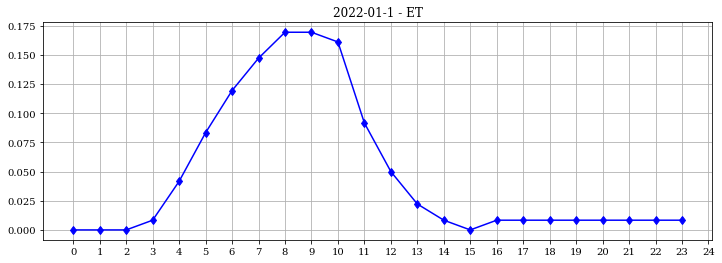

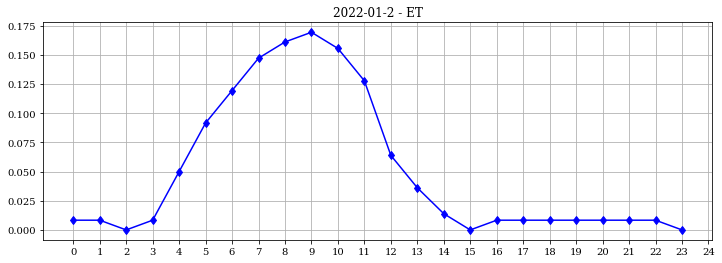

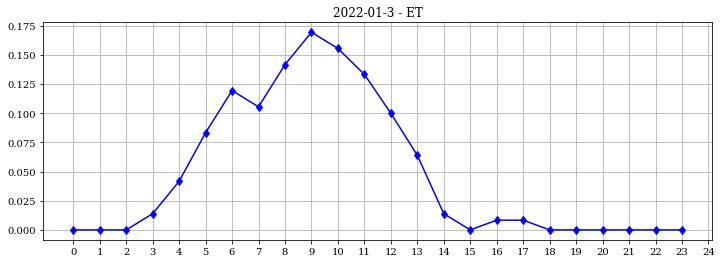

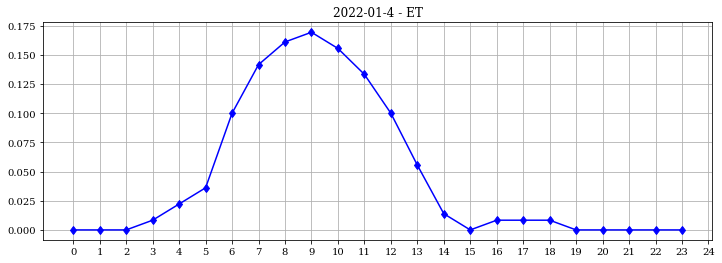

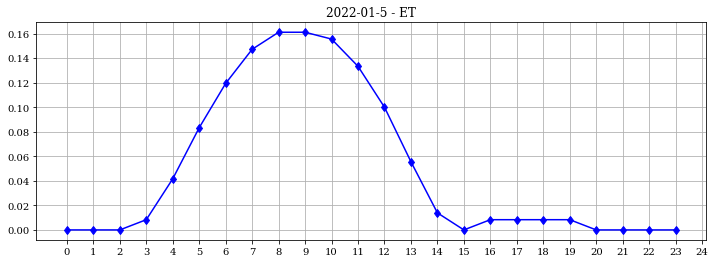

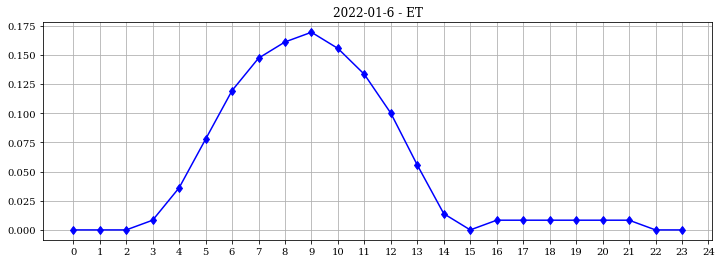

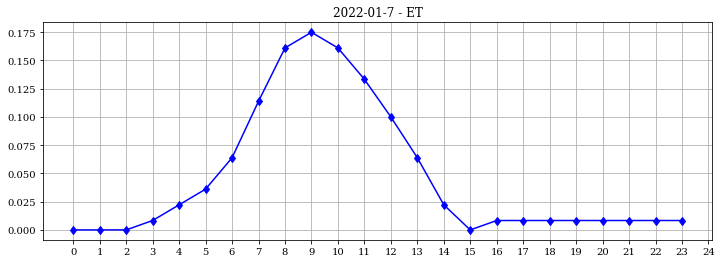

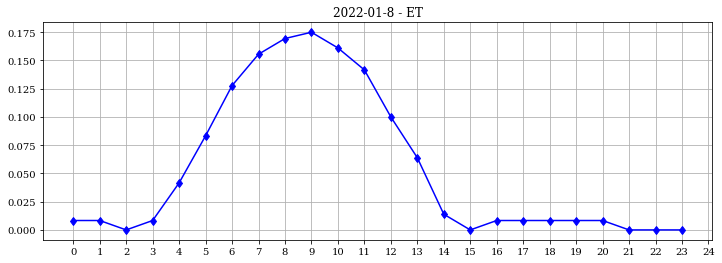

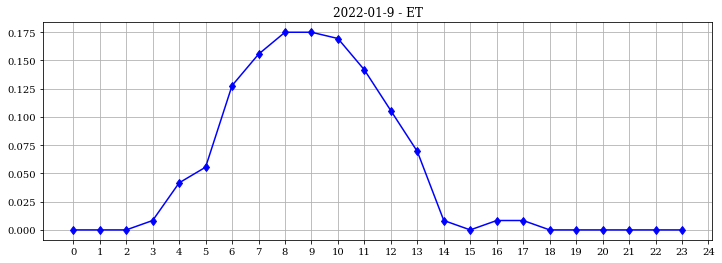

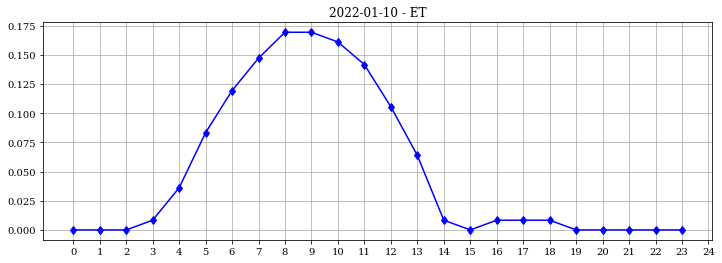

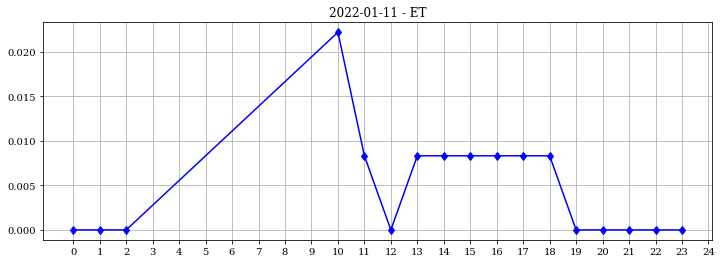

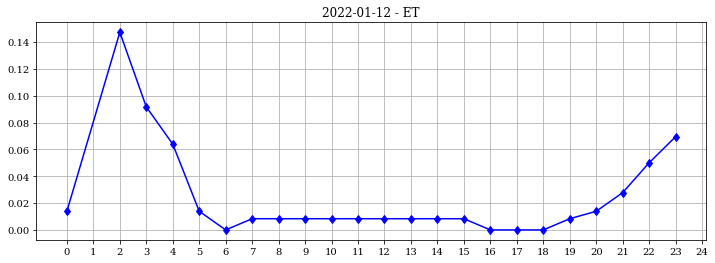

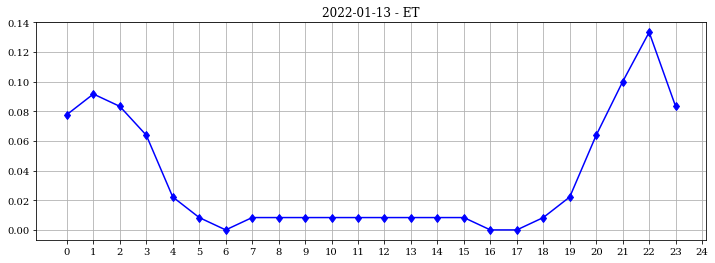

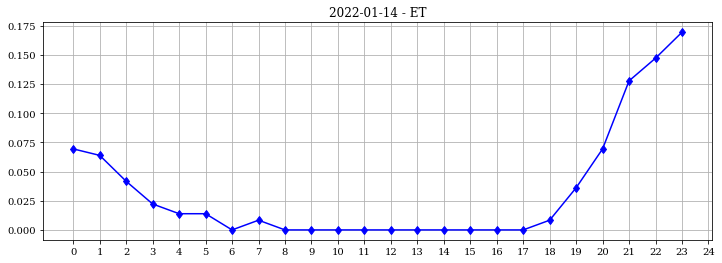

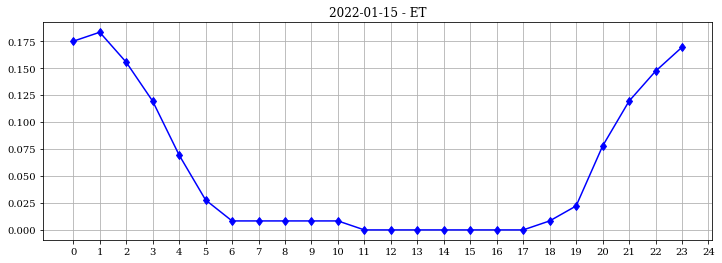

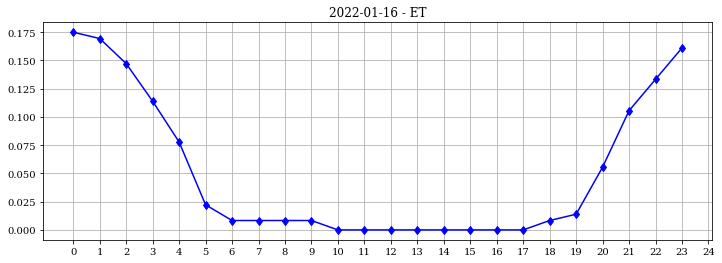

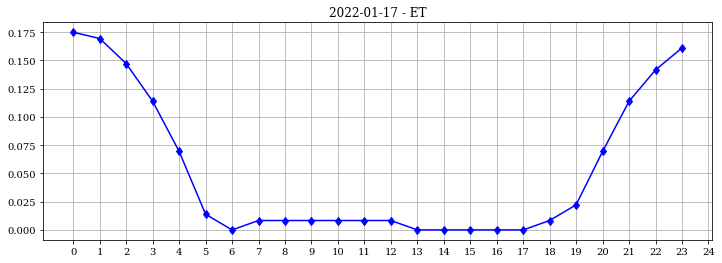

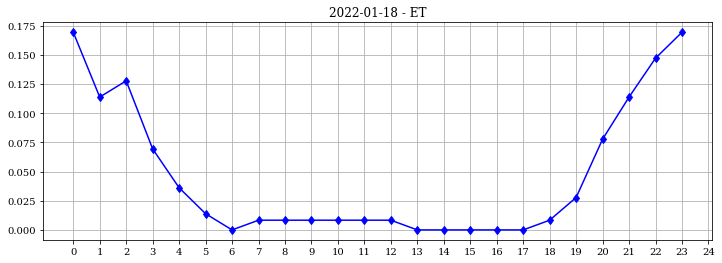

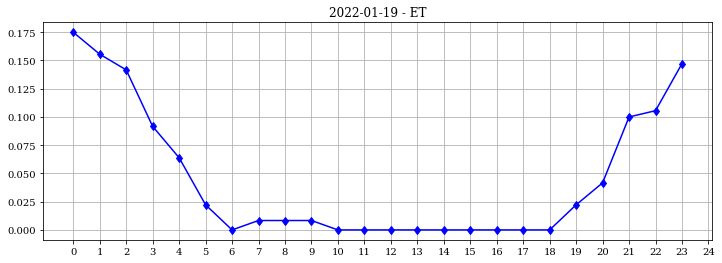

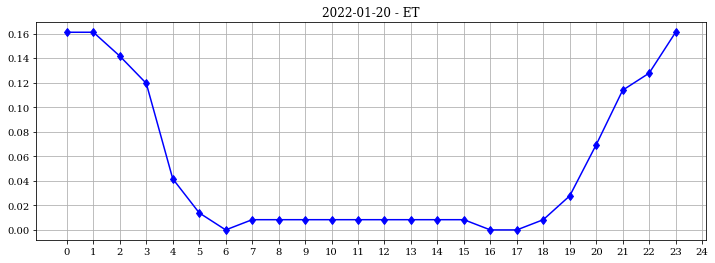

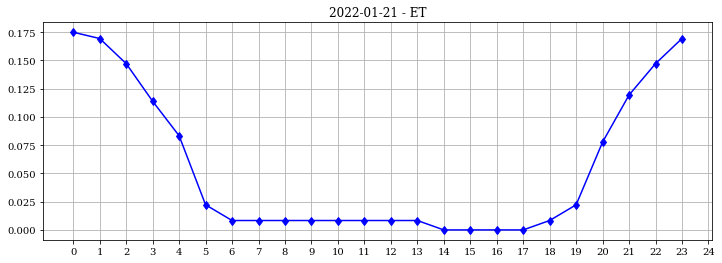

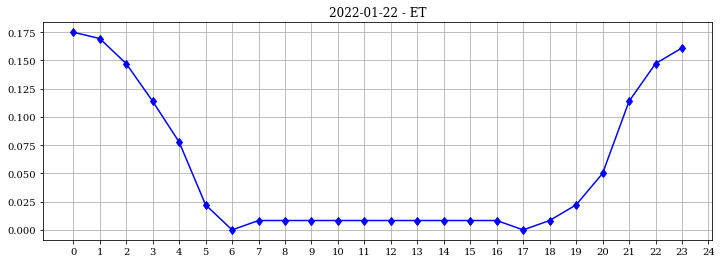

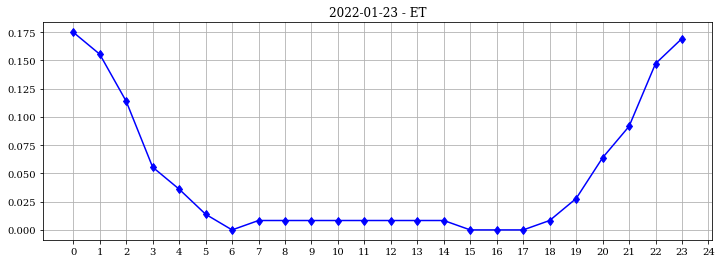

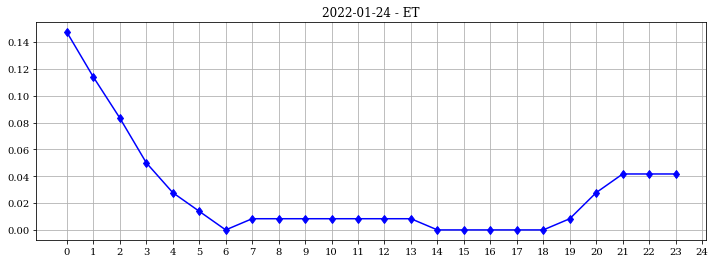

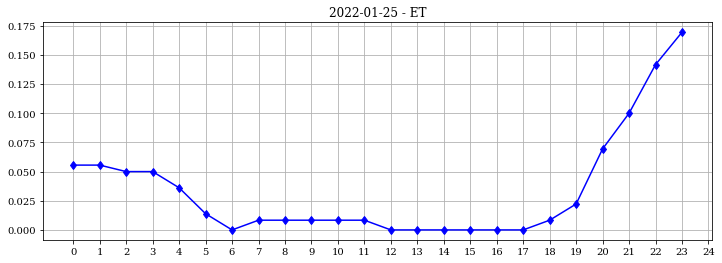

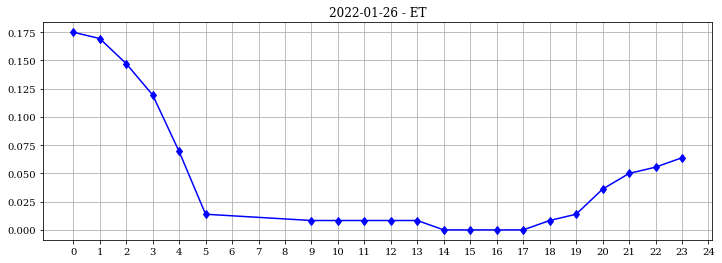

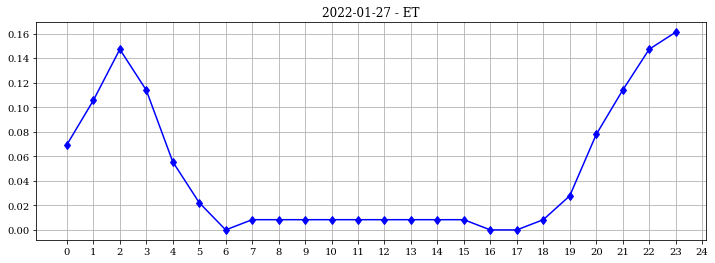

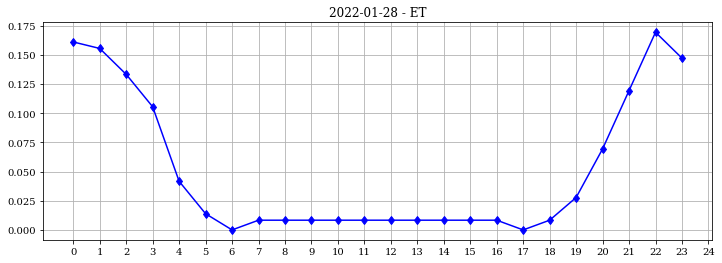

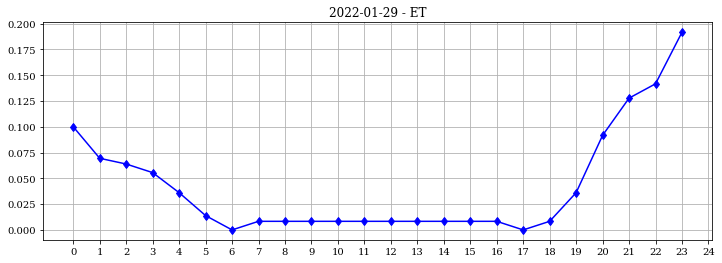

In [55]:
for i in range(1,30):
    fecha = f'2022-01-{i}'
    variable = 'ET'
    df_seleccion = df_prueba[df_prueba['Date']==fecha]

    # Visualización
    plt.figure(figsize=(12,4))
    plt.title(f'{fecha} - {variable}')
    xticks_ = [i for i in range(0,25,1)]
    plt.xticks(xticks_)
    plt.plot(df_seleccion.Time, df_seleccion[variable]*10/36, 'bd-')
    # plt.axvline(x=10.28, color='red')
    plt.grid();

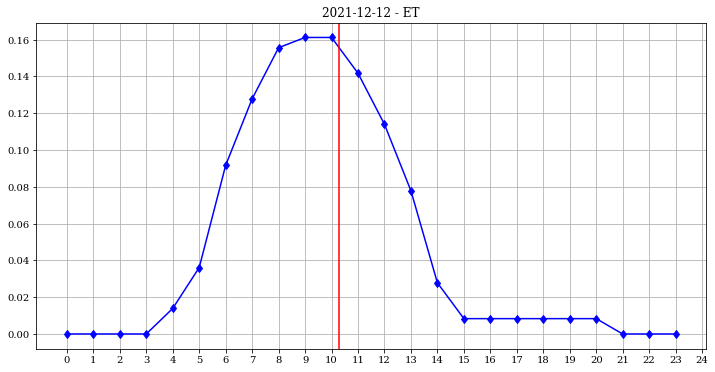

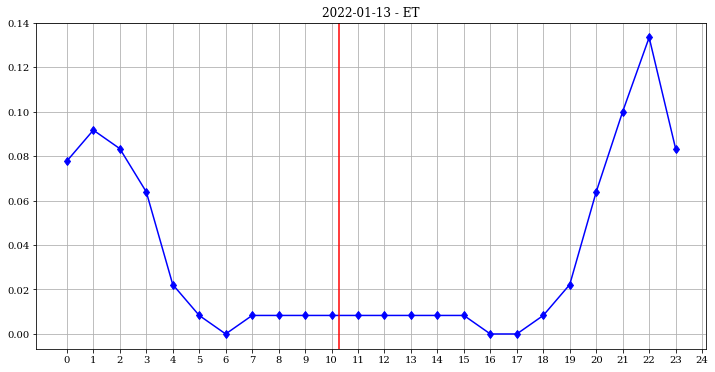

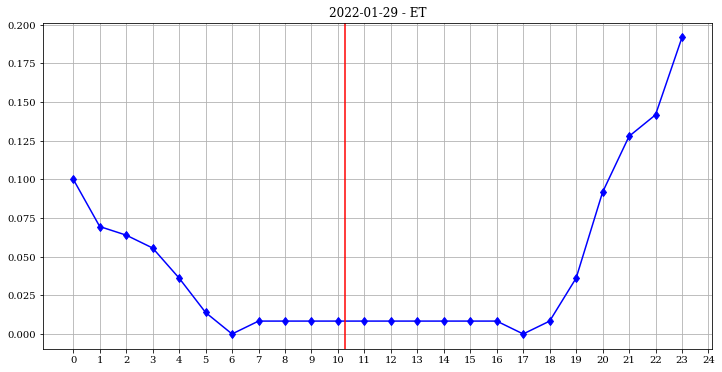

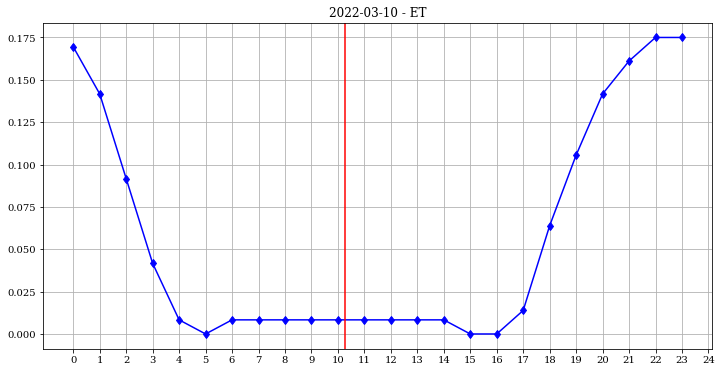

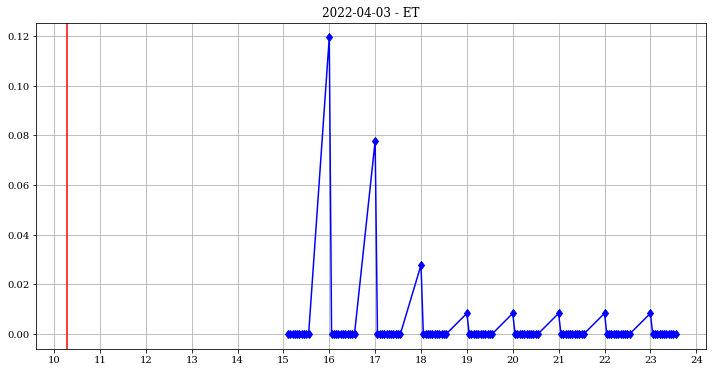

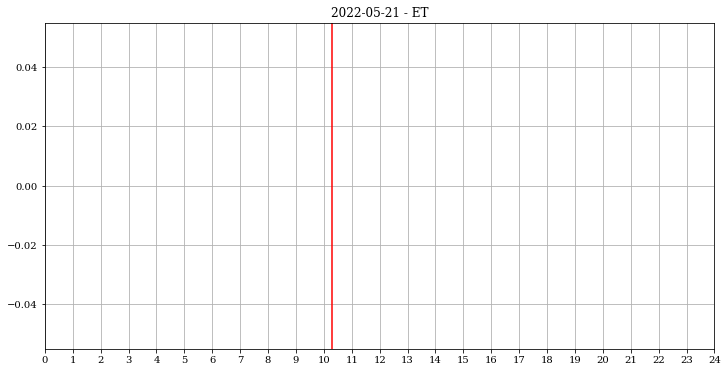

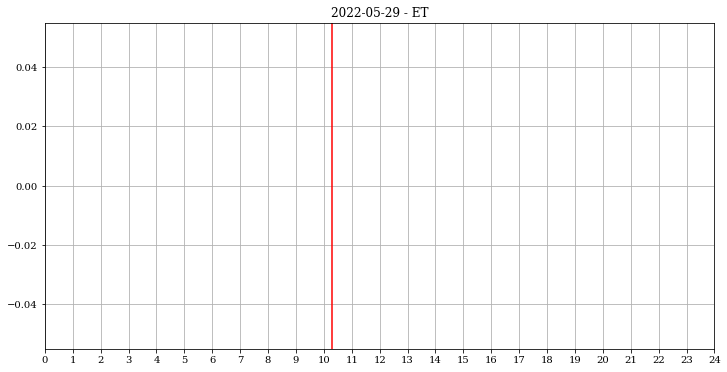

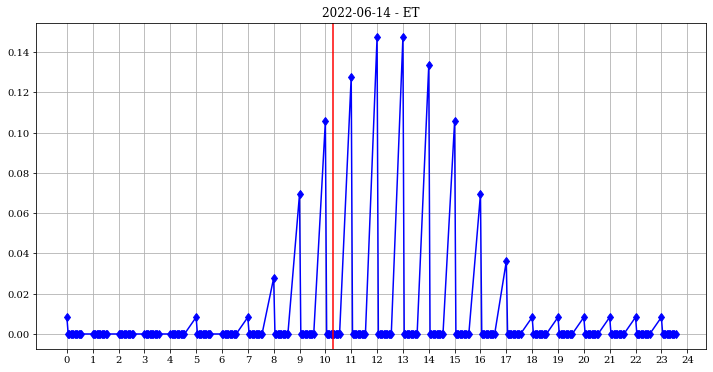

In [8]:
xticks_ = [i for i in range(0,25,1)]
# variable = 'Wind Speed' 
variable = 'ET'

for fecha in fechas_imgs:
    
    df_seleccion = df_prueba[df_prueba['Date']==fecha]
    
    # Visualización
    plt.figure(figsize=(12,6))
    plt.title(f'{fecha} - {variable}')
    plt.xticks(xticks_)
    plt.plot(df_seleccion.Time, df_seleccion[variable]*10/36, 'bd-')
    plt.axvline(x=10.28, color='red')
    plt.grid();

In [11]:
datos_hora_imagen

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
1709 2021-12-12   0.00      16.4     16.9      16.4     93.0     15.3   
1710 2021-12-12   1.00      16.1     16.4      16.1     93.0     15.0   
1711 2021-12-12   2.00      16.3     16.4      16.2     94.0     15.4   
1712 2021-12-12   3.00      16.7     16.7      16.2     94.0     15.7   
1713 2021-12-12   4.00      17.7     17.7      16.7     94.0     16.7   
...         ...    ...       ...      ...       ...      ...      ...   
7607 2022-06-14  23.35      15.7     15.8      15.6     84.0     13.0   
7608 2022-06-14  23.40      15.6     15.6      15.5     84.0     12.9   
7609 2022-06-14  23.45      15.4     15.5      15.4     84.0     12.8   
7610 2022-06-14  23.50      15.4     15.4      15.3     85.0     12.9   
7611 2022-06-14  23.55      15.3     15.3      15.2     85.0     12.8   

      Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
1709         0.0      NaN       0.0  ...      62    15.9      23.9    11.26   
1710         0.0      NaN       0.0  ...      62    15.5      23.5    11.27   
1711         0.0      NaN       0.0  ...      63    15.7      23.5    11.48   
1712         0.0      NaN       0.0  ...      63    15.6      23.3    11.48   
1713         0.0      NaN       0.0  ...      63    15.9      23.7    11.47   
...          ...      ...       ...  ...     ...     ...       ...      ...   
7607         0.0      NaN       0.0  ...      52    13.9      24.4     9.53   
7608         0.0      NaN       0.0  ...      52    13.9      24.4     9.53   
7609         0.0      NaN       0.0  ...      52    13.9      24.4     9.53   
7610         0.0      NaN       0.0  ...      52    13.9      24.4     9.53   
7611         0.0      NaN       0.0  ...      52    13.9      24.4     9.53   

      In Air Density    ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
1709          1.1665  0.00       1405        1        100.0         60  
1710          1.1690  0.00       1404        1        100.0         60  
1711          1.1700  0.00       1405        1        100.0         60  
1712          1.1720  0.00       1405        1        100.0         60  
1713          1.1707  0.05       1405        1        100.0         60  
...              ...   ...        ...      ...          ...        ...  
7607          1.1660  0.00        106        1         93.0          5  
7608          1.1660  0.00        106        1         93.0          5  
7609          1.1663  0.00        107        1         93.9          5  
7610          1.1663  0.00        106        1         93.0          5  
7611          1.1663  0.00        105        1         92.1          5  

[490 rows x 38 columns]

In [8]:
datos_hora_imagen[datos_hora_imagen['Date']=='2022-01-13']

Date  Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
2467 2022-01-13   0.0      26.7     26.7      26.3     70.0     20.7   
2468 2022-01-13   1.0      27.1     27.1      26.3     69.0     20.9   
2469 2022-01-13   2.0      26.6     27.3      26.3     68.0     20.2   
2470 2022-01-13   3.0      26.2     26.8      26.2     69.0     20.0   
2471 2022-01-13   4.0      24.8     26.2      24.8     73.0     19.7   
2472 2022-01-13   5.0      24.2     24.8      24.2     76.0     19.7   
2473 2022-01-13   6.0      23.3     24.2      23.3     79.0     19.4   
2474 2022-01-13   7.0      22.7     23.3      22.7     80.0     19.1   
2475 2022-01-13   8.0      22.6     22.8      22.6     79.0     18.8   
2476 2022-01-13   9.0      22.1     22.6      22.1     82.0     18.9   
2477 2022-01-13  10.0      22.2     22.3      22.1     81.0     18.8   
2478 2022-01-13  11.0      21.8     22.2      21.8     82.0     18.6   
2479 2022-01-13  12.0      21.4     21.8      21.4     83.0     18.4   
2480 2022-01-13  13.0      21.4     21.5      21.3     82.0     18.2   
2481 2022-01-13  14.0      21.3     21.5      21.3     84.0     18.5   
2482 2022-01-13  15.0      20.8     21.3      20.8     87.0     18.6   
2483 2022-01-13  16.0      20.6     20.8      20.6     88.0     18.6   
2484 2022-01-13  17.0      20.4     20.6      20.4     88.0     18.3   
2485 2022-01-13  18.0      20.2     20.4      20.2     90.0     18.5   
2486 2022-01-13  19.0      22.1     22.1      20.2     87.0     19.8   
2487 2022-01-13  20.0      26.1     26.1      22.1     70.0     20.2   
2488 2022-01-13  21.0      27.1     27.1      25.9     69.0     20.9   
2489 2022-01-13  22.0      27.6     27.9      27.0     66.0     20.7   
2490 2022-01-13  23.0      27.3     28.2      27.3     65.0     20.1   

      Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
2467         0.0       SW      0.00  ...      61    19.1      28.4    10.95   
2468         0.0      WSW      0.00  ...      60    19.2      28.9    10.75   
2469         0.0       SW      0.00  ...      59    19.1      29.1    10.55   
2470         0.0       SW      0.00  ...      59    18.9      28.7    10.55   
2471         0.0        S      0.00  ...      60    18.6      27.9    10.75   
2472         0.0      SSW      0.00  ...      61    18.5      27.4    10.95   
2473         0.0        S      0.00  ...      62    18.4      26.9    11.17   
2474         0.0        N      0.00  ...      63    18.4      26.7    11.38   
2475         0.0      SSW      0.00  ...      61    17.7      26.3    10.98   
2476         0.0        N      0.00  ...      62    17.9      26.3    11.18   
2477         0.0      NaN      0.00  ...      63    18.0      26.2    11.39   
2478         0.0      NaN      0.00  ...      63    17.9      26.0    11.39   
2479         0.0       SW      0.00  ...      63    17.7      25.7    11.40   
2480         0.0      NaN      0.00  ...      63    17.6      25.6    11.41   
2481         0.0      NaN      0.00  ...      64    17.8      25.7    11.61   
2482         0.0      ESE      0.00  ...      65    17.9      25.6    11.81   
2483         0.0      ESE      0.00  ...      66    18.0      25.4    12.02   
2484         0.0        N      0.00  ...      66    17.8      25.1    12.03   
2485         0.0      NaN      0.00  ...      67    17.9      25.1    12.23   
2486         0.0      NaN      0.00  ...      66    18.2      25.7    12.01   
2487         0.0      ESE      0.00  ...      64    18.6      26.7    11.58   
2488         0.0      SSE      0.00  ...      61    18.5      27.4    10.95   
2489         0.0      WSW      0.00  ...      59    18.7      28.4    10.55   
2490         1.6       SW      1.61  ...      58    18.8      28.8    10.35   

      In Air Density    ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
2467          1.1495  0.28       1405        1        100.0         60  
2468          1.1472  0.33       1403        1        100.0         60  
2469          1

In [12]:
display(datos_hora_imagen[datos_hora_imagen['Time']==10.30])
display(datos_hora_imagen[datos_hora_imagen['Time']==11.00])

Date  Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
7450 2022-06-14  10.3      22.9     22.9      22.8     62.0     15.2   

      Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
7450         1.6        W      0.13  ...      54    14.6      24.6     9.83   

      In Air Density   ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
7450          1.1638  0.0        105        1         92.1          5  

[1 rows x 38 columns]

Date  Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
1720 2021-12-12  11.0      25.6     26.3      25.6     64.0     18.3   
2478 2022-01-13  11.0      21.8     22.2      21.8     82.0     18.6   
2859 2022-01-29  11.0      20.8     20.8      20.8     81.0     17.4   
3817 2022-03-10  11.0      21.5     22.2      21.5     83.0     18.5   
7456 2022-06-14  11.0      24.1     24.2      24.1     61.0     16.1   

      Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
1720         3.2      WSW      3.22  ...      54    17.6      28.3     9.75   
2478         0.0      NaN      0.00  ...      63    17.9      26.0    11.39   
2859         0.0      NaN      0.00  ...      57    16.8      26.3    10.20   
3817         0.0      NaN      0.00  ...      58    18.7      28.7    10.35   
7456         3.2      WNW      0.27  ...      54    14.6      24.6     9.83   

      In Air Density    ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
1720          1.1473  0.51       1405        1        100.0         60  
2478          1.1600  0.03       1405        1        100.0         60  
2859          1.1582  0.03       1405        1        100.0         60  
3817          1.1460  0.03       1404        1        100.0         60  
7456          1.1631  0.46        106        1         93.0          5  

[5 rows x 38 columns]

El día `2022-04-03` se tienen datos pero a partir de la hora 15:10 pero se requiere datos de la hora 10.28

In [14]:
datos_hora_imagen[datos_hora_imagen['Date']=='2022-04-03']

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
4332 2022-04-03  15.10      28.3     28.4      28.3     56.0     18.7   
4333 2022-04-03  15.15      28.2     28.3      28.2     56.0     18.6   
4334 2022-04-03  15.20      28.1     28.2      28.1     56.0     18.5   
4335 2022-04-03  15.25      28.1     28.1      28.1     58.0     19.0   
4336 2022-04-03  15.30      28.1     28.2      28.1     57.0     18.8   
...         ...    ...       ...      ...       ...      ...      ...   
4433 2022-04-03  23.35      20.1     20.1      20.1     86.0     17.7   
4434 2022-04-03  23.40      20.1     20.1      20.1     86.0     17.6   
4435 2022-04-03  23.45      20.1     20.1      20.0     86.0     17.6   
4436 2022-04-03  23.50      20.0     20.1      20.0     86.0     17.6   
4437 2022-04-03  23.55      19.9     20.0      19.9     86.0     17.5   

      Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
4332         8.0       SW      0.67  ...      49    18.8      32.2     8.85   
4333         8.0      WSW      0.67  ...      49    18.8      32.2     8.85   
4334         6.4       SW      0.54  ...      49    18.8      32.2     8.85   
4335         6.4       SW      0.54  ...      49    18.9      32.3     8.85   
4336         6.4       SW      0.54  ...      49    18.9      32.3     8.85   
...          ...      ...       ...  ...     ...     ...       ...      ...   
4433         0.0       SW      0.00  ...      51    19.1      31.8     9.22   
4434         0.0       SW      0.00  ...      51    19.0      31.7     9.22   
4435         0.0       SW      0.00  ...      51    19.0      31.7     9.22   
4436         0.0       SW      0.00  ...      51    19.0      31.7     9.22   
4437         0.0       SW      0.00  ...      51    19.0      31.7     9.22   

      In Air Density   ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
4332          1.1258  0.0         99        1         86.8          5  
4333          1.1256  0.0         99        1         86.8          5  
4334          1.1256  0.0         99        1         86.8          5  
4335          1.1253  0.0         98        1         86.0          5  
4336          1.1253  0.0         94        1         82.5          5  
...              ...  ...        ...      ...          ...        ...  
4433          1.1302  0.0         91        1         79.8          5  
4434          1.1305  0.0         96        1         84.2          5  
4435          1.1305  0.0         91        1         79.8          5  
4436          1.1305  0.0         92        1         80.7          5  
4437          1.1307  0.0         94        1         82.5          5  

[106 rows x 38 columns]

## Dataframe `Vista_florida_datos_met_2022_marzo.csv`

Lectura del archivo

In [2]:
path_csv = r'F:\Tesis\2021-Metric\Archivos\Vista_florida_datos_met_2022_marzo.csv'
df_estacion_vf = pd.read_csv(path_csv, 
                             encoding='latin-1',
                             na_values='---',
                             skiprows=(0,1,2,3,4),
                             decimal=','
                            )
df_estacion_vf.columns

Index(['Date & Time', 'Barómetro - mb', 'Temperatura interior - °C',
       'Dentro de Hum - %', 'Dentro del punto de rocío - °C',
       'Dentro de índice de calor - °C', 'Dentro de EMC', 'Temp - °C',
       'Temp. Alta - °C', 'Temp. Baja - °C', 'Hum - %', 'Punto de rocío - °C',
       'Bulbo Húmedo - °C', 'Velocidad del viento - km/h',
       'Dirección del viento', 'Viento Corriente - km',
       'Alta velocidad del viento - km/h', 'Alta Dirección del viento',
       'Viento Frío - °C', 'Índice de calor - °C', 'THW Index - °C',
       'THSW  índice - °C', 'Lluvia - mm', 'Tasa de lluvia - mm/h',
       'Rad Solar - W/m^2', 'Energía solar - Ly', 'Rad Solar Alta - W/m^2',
       'ET - mm', 'El índice UV', 'Dosis de UV - MEDs', 'Alto índice UV',
       'Días-grado de calentamiento', 'Días-grado de enfriamiento',
       '2ª Temp - °C'],
      dtype='object')

In [3]:
df_vf = df_estacion_vf.copy()

In [4]:
df_vf['Date & Time'] = pd.to_datetime(df_vf['Date & Time'], format='%d/%m/%y %I:%M %p')

# # Nuevas columnas a partir de la primera para filtrado
df_vf['Fecha'] = pd.DatetimeIndex(df_vf['Date & Time']).strftime('%Y-%m-%d')
df_vf['Hora'] = pd.DatetimeIndex(df_vf['Date & Time']).hour
df_vf['Minuto'] = pd.DatetimeIndex(df_vf['Date & Time']).minute

df_vf = df_vf[['Date & Time', 'Fecha', 'Hora', 'Minuto', 'Velocidad del viento - km/h', 'ET - mm']]
df_vf

Date & Time       Fecha  Hora  Minuto  \
0    2022-03-01 00:00:00  2022-03-01     0       0   
1    2022-03-01 00:05:00  2022-03-01     0       5   
2    2022-03-01 00:10:00  2022-03-01     0      10   
3    2022-03-01 00:15:00  2022-03-01     0      15   
4    2022-03-01 00:20:00  2022-03-01     0      20   
...                  ...         ...   ...     ...   
4028 2022-03-14 23:40:00  2022-03-14    23      40   
4029 2022-03-14 23:45:00  2022-03-14    23      45   
4030 2022-03-14 23:50:00  2022-03-14    23      50   
4031 2022-03-14 23:55:00  2022-03-14    23      55   
4032 2022-03-15 00:00:00  2022-03-15     0       0   

      Velocidad del viento - km/h  ET - mm  
0                             0.0     0.03  
1                             0.0     0.00  
2                             0.0     0.00  
3                             1.6     0.00  
4                             0.0     0.00  
...                           ...      ...  
4028                          0.0     0.00  
4029                          0.0     0.00  
4030                          0.0     0.00  
4031                          0.0     0.00  
4032                          0.0     0.00  

[4033 rows x 6 columns]

In [5]:
fecha = '2022-03-10'
df_vf_filtrado = df_vf[(df_vf['Fecha'] == fecha) & (df_vf['Minuto'] == 0)]
df_vf_filtrado

Date & Time       Fecha  Hora  Minuto  \
2592 2022-03-10 00:00:00  2022-03-10     0       0   
2604 2022-03-10 01:00:00  2022-03-10     1       0   
2616 2022-03-10 02:00:00  2022-03-10     2       0   
2628 2022-03-10 03:00:00  2022-03-10     3       0   
2640 2022-03-10 04:00:00  2022-03-10     4       0   
2652 2022-03-10 05:00:00  2022-03-10     5       0   
2664 2022-03-10 06:00:00  2022-03-10     6       0   
2676 2022-03-10 07:00:00  2022-03-10     7       0   
2688 2022-03-10 08:00:00  2022-03-10     8       0   
2700 2022-03-10 09:00:00  2022-03-10     9       0   
2712 2022-03-10 10:00:00  2022-03-10    10       0   
2724 2022-03-10 11:00:00  2022-03-10    11       0   
2736 2022-03-10 12:00:00  2022-03-10    12       0   
2748 2022-03-10 13:00:00  2022-03-10    13       0   
2760 2022-03-10 14:00:00  2022-03-10    14       0   
2772 2022-03-10 15:00:00  2022-03-10    15       0   
2784 2022-03-10 16:00:00  2022-03-10    16       0   
2796 2022-03-10 17:00:00  2022-03-10    17       0   
2808 2022-03-10 18:00:00  2022-03-10    18       0   
2820 2022-03-10 19:00:00  2022-03-10    19       0   
2832 2022-03-10 20:00:00  2022-03-10    20       0   
2844 2022-03-10 21:00:00  2022-03-10    21       0   
2856 2022-03-10 22:00:00  2022-03-10    22       0   
2868 2022-03-10 23:00:00  2022-03-10    23       0   

      Velocidad del viento - km/h  ET - mm  
2592                          0.0     0.03  
2604                          0.0     0.03  
2616                          0.0     0.03  
2628                          1.6     0.00  
2640                          0.0     0.00  
2652                          1.6     0.00  
2664                          1.6     0.00  
2676                          1.6     0.00  
2688                          1.6     0.08  
2700                          1.6     0.25  
2712                          3.2     0.38  
2724                          1.6     0.53  
2736                          4.8     0.53  
2748                          6.4     0.41  
2760                          8.0     0.61  
2772                          4.8     0.53  
2784                          8.0     0.43  
2796                          3.2     0.25  
2808                          3.2     0.10  
2820                          1.6     0.03  
2832                          0.0     0.03  
2844                          3.2     0.03  
2856                          1.6     0.03  
2868                          1.6     0.03

In [6]:
df_vf_filtrado['Date & Time'][2592]

Timestamp('2022-03-10 00:00:00')

In [7]:
df_vf_filtrado.head(10)

Date & Time       Fecha  Hora  Minuto  \
2592 2022-03-10 00:00:00  2022-03-10     0       0   
2604 2022-03-10 01:00:00  2022-03-10     1       0   
2616 2022-03-10 02:00:00  2022-03-10     2       0   
2628 2022-03-10 03:00:00  2022-03-10     3       0   
2640 2022-03-10 04:00:00  2022-03-10     4       0   
2652 2022-03-10 05:00:00  2022-03-10     5       0   
2664 2022-03-10 06:00:00  2022-03-10     6       0   
2676 2022-03-10 07:00:00  2022-03-10     7       0   
2688 2022-03-10 08:00:00  2022-03-10     8       0   
2700 2022-03-10 09:00:00  2022-03-10     9       0   

      Velocidad del viento - km/h  ET - mm  
2592                          0.0     0.03  
2604                          0.0     0.03  
2616                          0.0     0.03  
2628                          1.6     0.00  
2640                          0.0     0.00  
2652                          1.6     0.00  
2664                          1.6     0.00  
2676                          1.6     0.00  
2688                          1.6     0.08  
2700                          1.6     0.25

In [8]:
display(df_vf_filtrado[df_vf_filtrado['Hora']==10])
display(df_vf_filtrado[df_vf_filtrado['Hora']==11])

Date & Time       Fecha  Hora  Minuto  \
2712 2022-03-10 10:00:00  2022-03-10    10       0   

      Velocidad del viento - km/h  ET - mm  
2712                          3.2     0.38

Date & Time       Fecha  Hora  Minuto  \
2724 2022-03-10 11:00:00  2022-03-10    11       0   

      Velocidad del viento - km/h  ET - mm  
2724                          1.6     0.53

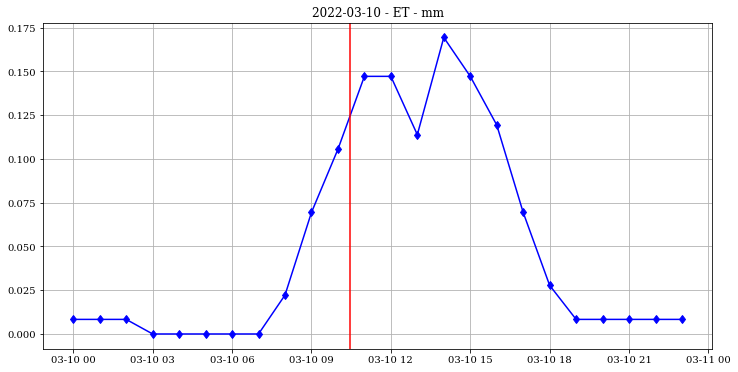

In [9]:
# variable = 'Velocidad del viento - km/h'
variable = 'ET - mm'
xticks_ = [i for i in range(0,25,1)]

# Visualización
plt.figure(figsize=(12,6))
plt.title(f'{fecha} - {variable}')
# plt.xticks(xticks_)
plt.plot(df_vf_filtrado['Date & Time'], df_vf_filtrado[variable]*1000/3600, 'bd-')
plt.axvline(x=pd.Timestamp('2022-03-10 10:28:00'), color='red')
plt.grid();

### Visualización con plotly

In [10]:
# df_vf_filtrado = df_vf[(df_vf['Fecha'] == fecha) & (df_vf['Minuto'] == 0)]
df_vf_filtrado

Date & Time       Fecha  Hora  Minuto  \
2592 2022-03-10 00:00:00  2022-03-10     0       0   
2604 2022-03-10 01:00:00  2022-03-10     1       0   
2616 2022-03-10 02:00:00  2022-03-10     2       0   
2628 2022-03-10 03:00:00  2022-03-10     3       0   
2640 2022-03-10 04:00:00  2022-03-10     4       0   
2652 2022-03-10 05:00:00  2022-03-10     5       0   
2664 2022-03-10 06:00:00  2022-03-10     6       0   
2676 2022-03-10 07:00:00  2022-03-10     7       0   
2688 2022-03-10 08:00:00  2022-03-10     8       0   
2700 2022-03-10 09:00:00  2022-03-10     9       0   
2712 2022-03-10 10:00:00  2022-03-10    10       0   
2724 2022-03-10 11:00:00  2022-03-10    11       0   
2736 2022-03-10 12:00:00  2022-03-10    12       0   
2748 2022-03-10 13:00:00  2022-03-10    13       0   
2760 2022-03-10 14:00:00  2022-03-10    14       0   
2772 2022-03-10 15:00:00  2022-03-10    15       0   
2784 2022-03-10 16:00:00  2022-03-10    16       0   
2796 2022-03-10 17:00:00  2022-03-10    17       0   
2808 2022-03-10 18:00:00  2022-03-10    18       0   
2820 2022-03-10 19:00:00  2022-03-10    19       0   
2832 2022-03-10 20:00:00  2022-03-10    20       0   
2844 2022-03-10 21:00:00  2022-03-10    21       0   
2856 2022-03-10 22:00:00  2022-03-10    22       0   
2868 2022-03-10 23:00:00  2022-03-10    23       0   

      Velocidad del viento - km/h  ET - mm  
2592                          0.0     0.03  
2604                          0.0     0.03  
2616                          0.0     0.03  
2628                          1.6     0.00  
2640                          0.0     0.00  
2652                          1.6     0.00  
2664                          1.6     0.00  
2676                          1.6     0.00  
2688                          1.6     0.08  
2700                          1.6     0.25  
2712                          3.2     0.38  
2724                          1.6     0.53  
2736                          4.8     0.53  
2748                          6.4     0.41  
2760                          8.0     0.61  
2772                          4.8     0.53  
2784                          8.0     0.43  
2796                          3.2     0.25  
2808                          3.2     0.10  
2820                          1.6     0.03  
2832                          0.0     0.03  
2844                          3.2     0.03  
2856                          1.6     0.03  
2868                          1.6     0.03

In [11]:
import plotly.graph_objects as go

In [12]:
fecha = '2022-03-10'
df_vf_filtrado = df_vf[df_vf['Fecha'] == fecha]
# df_vf_filtrado = df_vf[(df_vf['Fecha'] == fecha) & (df_vf['Minuto'] == 0)]

# Selección de variable
# variable = 'Velocidad del viento - km/h'
variable = 'ET - mm'

# Visualización con Plotly

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=df_vf_filtrado['Date & Time'], 
               y=df_vf_filtrado[variable],
               name=variable, 
               marker_color= 'rgba(0, 0, 0, 0.7)',
               mode='lines+markers',
               xhoverformat="%I:%M %p",
               hovertemplate='%{y}',
               line = dict(width=2)
               )
    )

# Título y hover
title_plotly = variable

fig.update_layout(
    plot_bgcolor = "white",
#     width = 800, 
    height = 400,
    hovermode="x unified",
    title = title_plotly,
    margin=dict(t=75, b=25, l=0, r=0),
    legend=dict(x=0.27, y=-0.10),      # Posición de leyenda
#     legend_orientation='h',
    font_family='sans-serif'
)

fig.add_vline(
    x=pd.Timestamp(f'{fecha} 10:28:00'),
    line_color="red"
)

# Obtener ticks mensuales
fig.update_xaxes(
    showline=True, 
    linecolor='black', 
    mirror=True,
    gridcolor='#7f7f7f',
#     dtick='M1', 
#     tickformat='%I:%M %p'#'%m-%Y'
    )

fig.update_yaxes(
    showline=True, 
    linecolor='black', 
    mirror=True,
    gridcolor='#7f7f7f'
)
fig.show()

In [14]:
display( df_vf[(df_vf['Fecha'] == fecha) & (df_vf['Minuto'] == 0) & (df_vf['Hora'] == 11)])
display( df_vf[(df_vf['Fecha'] == fecha) & (df_vf['Minuto'] == 30) & (df_vf['Hora'] == 10)])

Date & Time       Fecha  Hora  Minuto  \
2724 2022-03-10 11:00:00  2022-03-10    11       0   

      Velocidad del viento - km/h  ET - mm  
2724                          1.6     0.53

Date & Time       Fecha  Hora  Minuto  \
2718 2022-03-10 10:30:00  2022-03-10    10      30   

      Velocidad del viento - km/h  ET - mm  
2718                          3.2      0.0

In [15]:
1.6*10/36

0.4444444444444444

## Prueba valores horarios

In [4]:
ruta_csv = 'EE_Vista_Florida.csv'
df_estacion_vf = pd.read_csv(ruta_csv, na_values='---') 
df_estacion_vf.Date = pd.to_datetime(df_estacion_vf.Date, format='%d/%m/%Y')
df_estacion_vf

Date   Time  Temp Out  Hi Temp  Low Temp  Out Hum  Dew Pt.  \
0     2021-10-01  01:00      17.8     17.8      15.9     89.0     15.9   
1     2021-10-01  02:00      20.5     20.5      17.8     79.0     16.7   
2     2021-10-01  03:00      23.5     23.5      20.5     69.0     17.5   
3     2021-10-01  04:00      24.8     24.8      23.4     66.0     18.0   
4     2021-10-01  05:00      24.8     24.8      24.0     64.0     17.6   
...          ...    ...       ...      ...       ...      ...      ...   
17127 2022-08-04  05:35      21.3     21.5      21.2     74.0     16.5   
17128 2022-08-04  05:40      21.5     21.6      21.5     74.0     16.7   
17129 2022-08-04  10:20       NaN      NaN       NaN      NaN      NaN   
17130 2022-08-04  10:25      21.9     22.2      21.7     75.0     17.3   
17131 2022-08-04  10:30      22.3     22.4      22.2     73.0     17.2   

       Wind Speed Wind Dir  Wind Run  ...  In Hum In  Dew  In  Heat  In  EMC  \
0             0.0        N      0.00  ...      61    14.9      23.0    11.13   
1             0.0        N      0.00  ...      60    15.7      24.1    10.95   
2             0.0      ENE      0.00  ...      58    16.2      25.3    10.47   
3             0.0        N      0.00  ...      56    16.6      26.4    10.09   
4             0.0      ENE      0.00  ...      54    16.4      26.7     9.76   
...           ...      ...       ...  ...     ...     ...       ...      ...   
17127         1.6      ENE      0.13  ...      57    16.3      25.7    10.24   
17128         1.6      ENE      0.13  ...      57    16.4      25.7    10.23   
17129         0.0      NaN      0.00  ...      58    16.6      25.8    10.43   
17130         1.6      ENE      0.13  ...      58    16.6      25.8    10.43   
17131         3.2        S      0.27  ...      58    16.7      25.8    10.43   

       In Air Density    ET  Wind Samp  Wind Tx  ISS  Recept  Arc. Int.  
0              1.1735  0.10       1403        1        100.0         60  
1              1.1680  0.25       1406        1        100.0         60  
2              1.1625  0.38       1404        1        100.0         60  
3              1.1573  0.48       1405        1        100.0         60  
4              1.1546  0.53       1405        1        100.0         60  
...               ...   ...        ...      ...          ...        ...  
17127          1.1559  0.00         87        1         76.3          5  
17128          1.1556  0.00         85        1         74.6          5  
17129          1.1553  0.00          0        1          0.0          5  
17130          1.1552  0.00         86        1         75.4          5  
17131          1.1549  0.00        107        1         93.9          5  

[17132 rows x 38 columns]

In [40]:
df_vf = df_estacion_vf.copy()

In [45]:
df_vf['Time']

0        01:00
1        02:00
2        03:00
3        04:00
4        05:00
         ...  
17127    05:35
17128    05:40
17129    10:20
17130    10:25
17131    10:30
Name: Time, Length: 17132, dtype: object

In [36]:
df_vf['Time'] = pd.to_datetime(df_vf['Time'], format='%H:%M')
df_vf['Mes'] = pd.DatetimeIndex(df_vf['Date']).month
df_vf['Hora'] = pd.DatetimeIndex(df_vf['Time']).hour
df_vf['Minuto'] = pd.DatetimeIndex(df_vf['Time']).minute

df_vf = df_vf[['Date', 'Time', 'Mes','Hora', 'Minuto', 'Wind Speed', 'ET']]
df_vf

Date                Time  Mes  Hora  Minuto  Wind Speed    ET
0     2021-10-01 1900-01-01 01:00:00   10     1       0         0.0  0.10
1     2021-10-01 1900-01-01 02:00:00   10     2       0         0.0  0.25
2     2021-10-01 1900-01-01 03:00:00   10     3       0         0.0  0.38
3     2021-10-01 1900-01-01 04:00:00   10     4       0         0.0  0.48
4     2021-10-01 1900-01-01 05:00:00   10     5       0         0.0  0.53
...          ...                 ...  ...   ...     ...         ...   ...
17127 2022-08-04 1900-01-01 05:35:00    8     5      35         1.6  0.00
17128 2022-08-04 1900-01-01 05:40:00    8     5      40         1.6  0.00
17129 2022-08-04 1900-01-01 10:20:00    8    10      20         0.0  0.00
17130 2022-08-04 1900-01-01 10:25:00    8    10      25         1.6  0.00
17131 2022-08-04 1900-01-01 10:30:00    8    10      30         3.2  0.00

[17132 rows x 7 columns]

In [39]:
df_vf.Date

0       2021-10-01
1       2021-10-01
2       2021-10-01
3       2021-10-01
4       2021-10-01
           ...    
17127   2022-08-04
17128   2022-08-04
17129   2022-08-04
17130   2022-08-04
17131   2022-08-04
Name: Date, Length: 17132, dtype: datetime64[ns]

In [29]:
prueba = df_vf[df_vf['Date']==1]

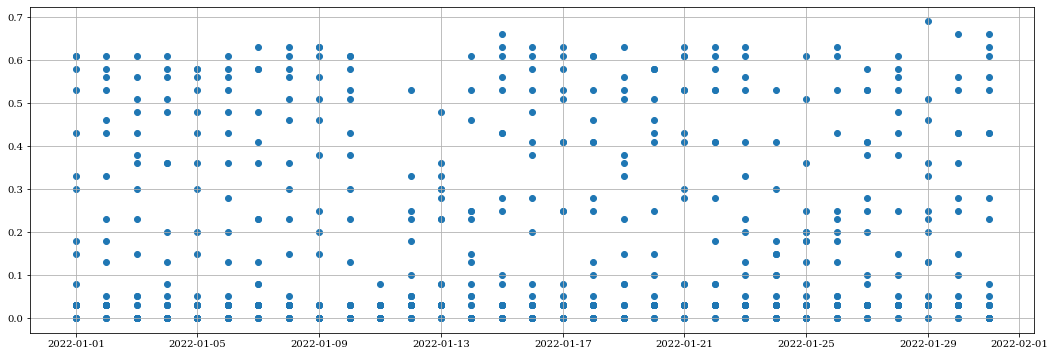

In [33]:
# Visualización
plt.figure(figsize=(18,6))
plt.scatter(prueba.Date, prueba.ET)
# plt.axvline(x=10.28, color='red')
plt.grid();